# Rstudioではじめる Rプログラミング入門
## 第２章 ライブラリの使用

ちゃっちゃっと何かを可視化したい……<br>
そんな時はqplot。<br>
それっぽい引数を入れてあげると、それっぽく返す。<br>
<br>
早速使ってみましょうか。<br>

In [4]:
qplot

ERROR: Error in eval(expr, envir, enclos): object 'qplot' not found


Rで多様されるプロットライブラリ <b>「ggplot2」</b>が準備されていないようですね。<br>
Pythonで言う所の import がなされていない感じです。<br>
入れてみますか……

In [5]:
library(ggplot2)

In [6]:
qplot

function (x, y, ..., data, facets = NULL, margins = FALSE, geom = "auto", 
    xlim = c(NA, NA), ylim = c(NA, NA), log = "", main = NULL, 
    xlab = NULL, ylab = NULL, asp = NA, stat = NULL, position = NULL) 
{
    caller_env <- parent.frame()
    if (!missing(stat)) 
        warning("`stat` is deprecated", call. = FALSE)
    if (!missing(position)) 
        warning("`position` is deprecated", call. = FALSE)
    if (!is.character(geom)) 
        stop("`geom` must be a character vector", call. = FALSE)
    exprs <- rlang::enquos(x = x, y = y, ...)
    is_missing <- vapply(exprs, rlang::quo_is_missing, logical(1))
    is_constant <- (!names(exprs) %in% ggplot_global$all_aesthetics) | 
        vapply(exprs, rlang::quo_is_call, logical(1), name = "I")
    mapping <- new_aes(exprs[!is_missing & !is_constant], env = parent.frame())
    consts <- exprs[is_constant]
    aes_names <- names(mapping)
    mapping <- rename_aes(mapping)
    if (is.null(xlab)) {
        xlab <- rlang::quo_name(exprs$x)
    }
    if (is.null(ylab)) {
        if (rlang::quo_is_null(exprs$y)) {
            ylab <- "NULL"
        }
        else {
            ylab <- rlang::quo_name(exprs$y)
        }
    }
    if (missing(data)) {
        data <- data.frame()
        facetvars <- all.vars(facets)
        facetvars <- facetvars[facetvars != "."]
        names(facetvars) <- facetvars
        facetsdf <- as.data.frame(mget(facetvars, envir = caller_env))
        if (nrow(facetsdf)) 
            data <- facetsdf
    }
    if ("auto" %in% geom) {
        if ("sample" %in% aes_names) {
            geom[geom == "auto"] <- "qq"
        }
        else if (missing(y)) {
            x <- rlang::eval_tidy(mapping$x, data, caller_env)
            if (is.discrete(x)) {
                geom[geom == "auto"] <- "bar"
            }
            else {
                geom[geom == "auto"] <- "histogram"
            }
            if (is.null(ylab)) 
                ylab <- "count"
        }
        else {
            if (missing(x)) {
                mapping$x <- rlang::quo(seq_along(!!mapping$y))
            }
            geom[geom == "auto"] <- "point"
        }
    }
    p <- ggplot(data, mapping, environment = caller_env)
    if (is.null(facets)) {
        p <- p + facet_null()
    }
    else if (is.formula(facets) && length(facets) == 2) {
        p <- p + facet_wrap(facets)
    }
    else {
        p <- p + facet_grid(facets = deparse(facets), margins = margins)
    }
    if (!is.null(main)) 
        p <- p + ggtitle(main)
    for (g in geom) {
        params <- lapply(consts, rlang::eval_tidy)
        p <- p + do.call(paste0("geom_", g), params)
    }
    logv <- function(var) var %in% strsplit(log, "")[[1]]
    if (logv("x")) 
        p <- p + scale_x_log10()
    if (logv("y")) 
        p <- p + scale_y_log10()
    if (!is.na(asp)) 
        p <- p + theme(aspect.ratio = asp)
    if (!missing(xlab)) 
        p <- p + xlab(xlab)
    if (!missing(ylab)) 
        p <- p + ylab(ylab)
    if (!missing(xlim)) 
        p <- p + xlim(xlim)
    if (!missing(ylim)) 
        p <- p + ylim(ylim)
    p
}
<bytecode: 0x55cd9f51d538>
<environment: namespace:ggplot2>

PCに入れていないパッケージを準備する時は install.packeges を使用してください。<br>
dependenciesは依存関係にあるパッケージをまとめてインストールしてくれます。

In [15]:
install.packages("tidyverse", dependencies = TRUE)

also installing the dependency ‘feather’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


現在インストール済みのパッケージの確認<br>
これもRstudioならコマンドを打たずに確認が取れる。

In [11]:
library()

<b>【注意】</b><br>
Rstudioがあるならばマウスでカチカチするだけで簡単にインストールできるので、<br>
だるい時は覚えなくても大丈夫だと思っています。<br>
(なんならRでもマウスカチカチでなんとかなる)

# ggplot2を使用してみよう
基本的なRパッケージである「ggplot2」を使用して、<br>
簡単にRパッケージの使用方法を学びましょう。

In [12]:
library(ggplot2)

In [17]:
a <- c(1,2,3,4,5,6)
b <- a**3

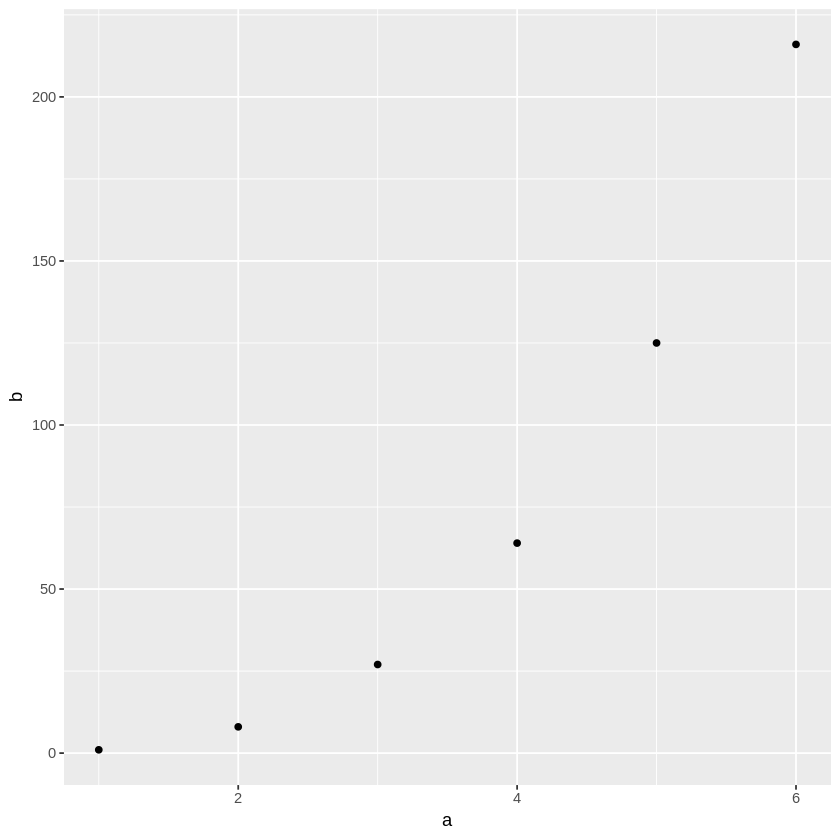

In [18]:
qplot(a,b)

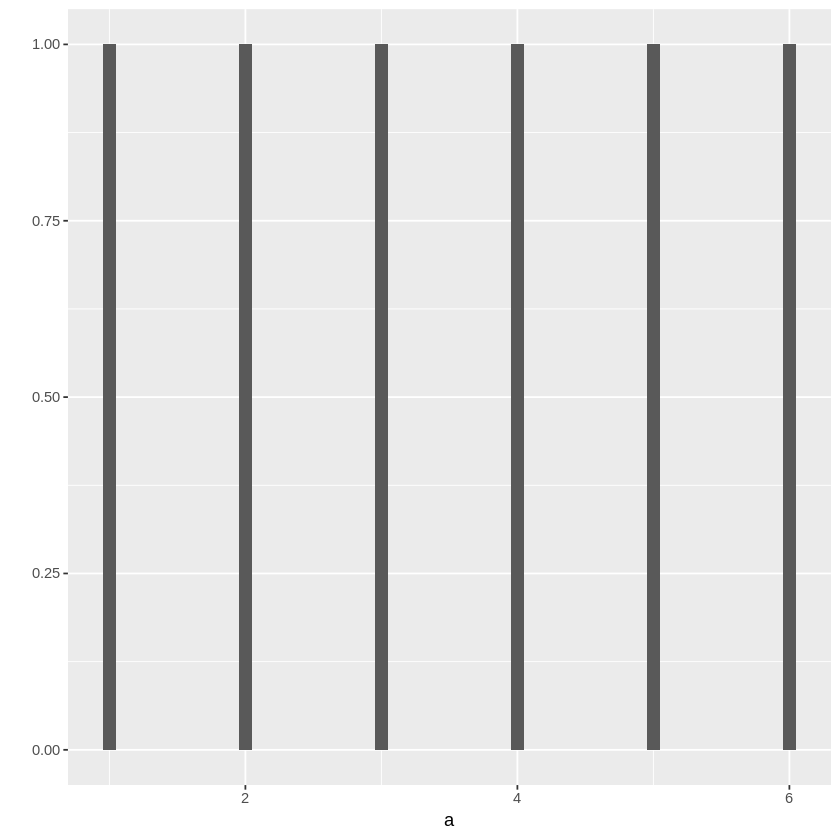

In [24]:
qplot(a , binwidth=0.1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


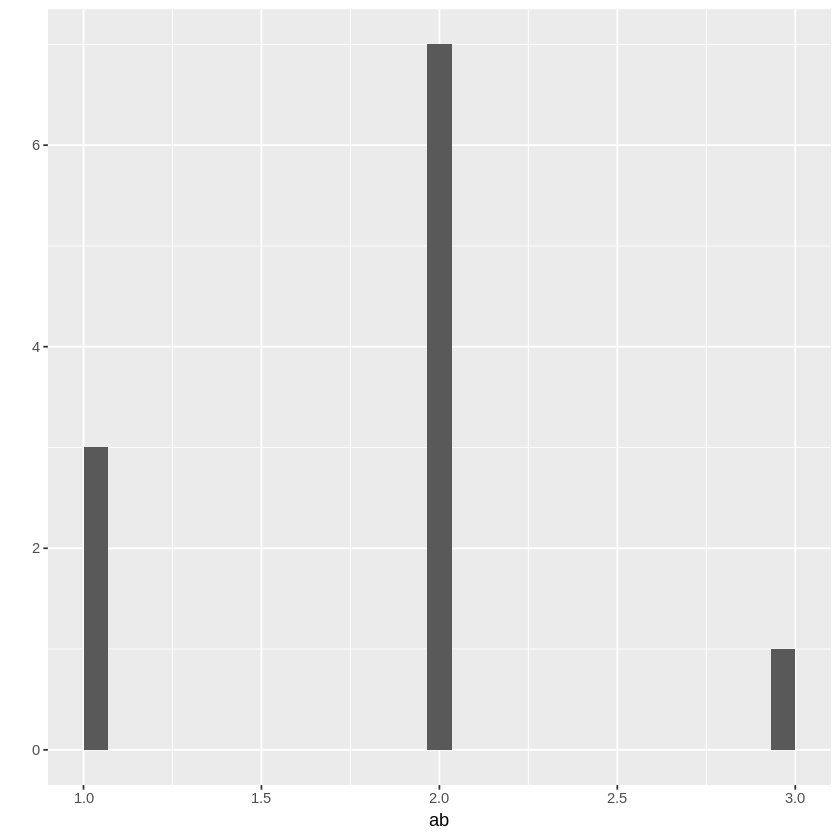

In [26]:
ab <- c(1,1,1,2,2,2,2,2,2,2,3)
qplot(ab)

# データを作成して可視化しよう

replicate関数は指定した回数だけ、設定した処理を繰り返します。<br>
`replicate(第一引数 : 繰り返す回数 , 第２引数 : 繰り返す処理 )`

In [ ]:
roll <- function(){
    die <- 1:6
    dice <- sample(die , size = 3, replace = TRUE)
    sum(dice)
}

In [27]:
replicate(3, print("hello"))

[1] "hello"
[1] "hello"
[1] "hello"


[1] "hello" "hello" "hello"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    8.00   10.00   10.51   13.00   18.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


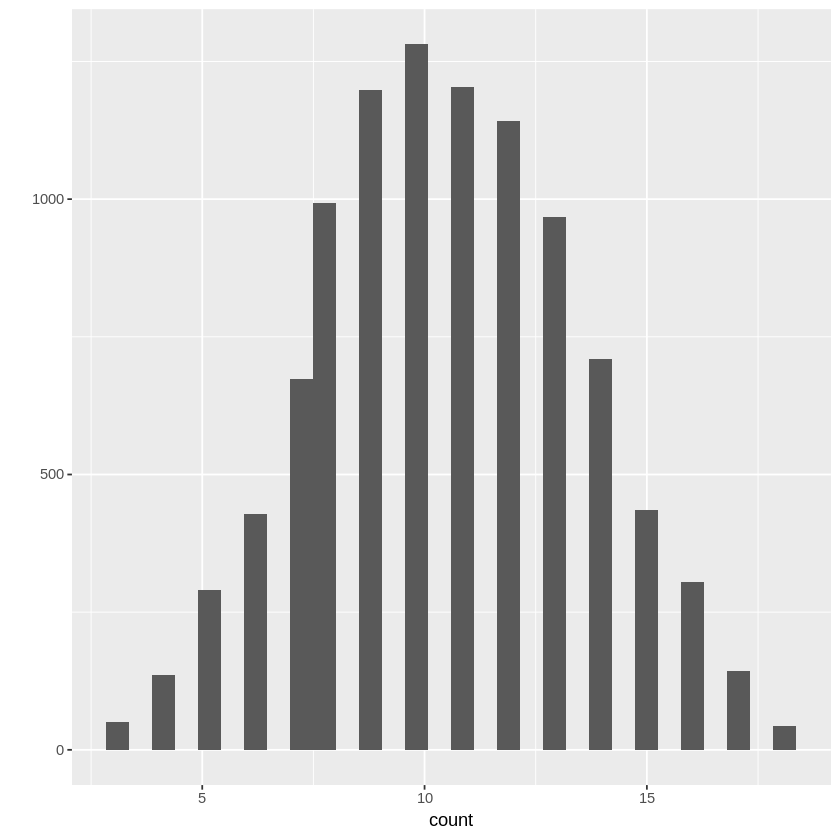

In [118]:
count <- replicate(10000,roll())
summary(count)
qplot(count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    8.00   11.00   10.53   13.00   18.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


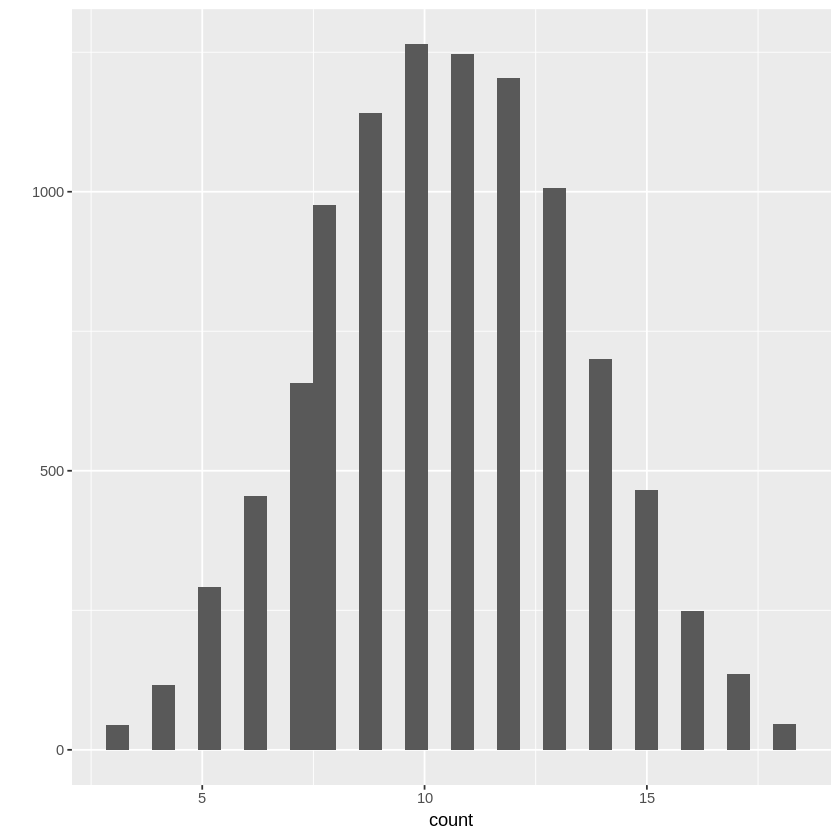

In [119]:
count <- replicate(10000,roll())
summary(count)
qplot(count)

# ヘルプページを活用してパッケージを使いこなそう
関数やパッケージの名前の前に` ? `をつけると、ヘルプページを表示してくれます。<br>
例えば平方根を表示してくれる`sqrt`のヘルプは……

In [128]:
?sqrt

## ヘルプページの構成要素
Rのヘルプページは下記のセクションで分割されています。<br>
とりあえず何がどこに書いているのか知って置くと幸せになれます。
***
### Discription (概要)
関数がしてくれることを、ざっくりと。
### Usage (構文)
関数の呼び出し方の例。個々の引数はRが想定している順番(デフォルトでの設定)で書いてる
### Arguments (引数)
関数がとる引数、Rが引数に渡すべき値として想定しているデータ型を説明。
### Details (詳細)
関数の動作について詳細な説明。注意事項があればここに書いてる。
### Valus (戻り値)
関数を実行した時に返ってくる値について。
### See Also (参照)
関連するR関数のリスト
### Example (使用例)
確実に動作する使用例。通常の使用法以外の使用法がある場合はこっちで説明。

***
今回はこのヘルプを使用してサイコロに細工をして、好きな目を出やすくしましょう。

In [137]:
?sample

正々堂々サイコロを転がすと、各目の出現確率は同じなので、似たような回数が出るはず。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


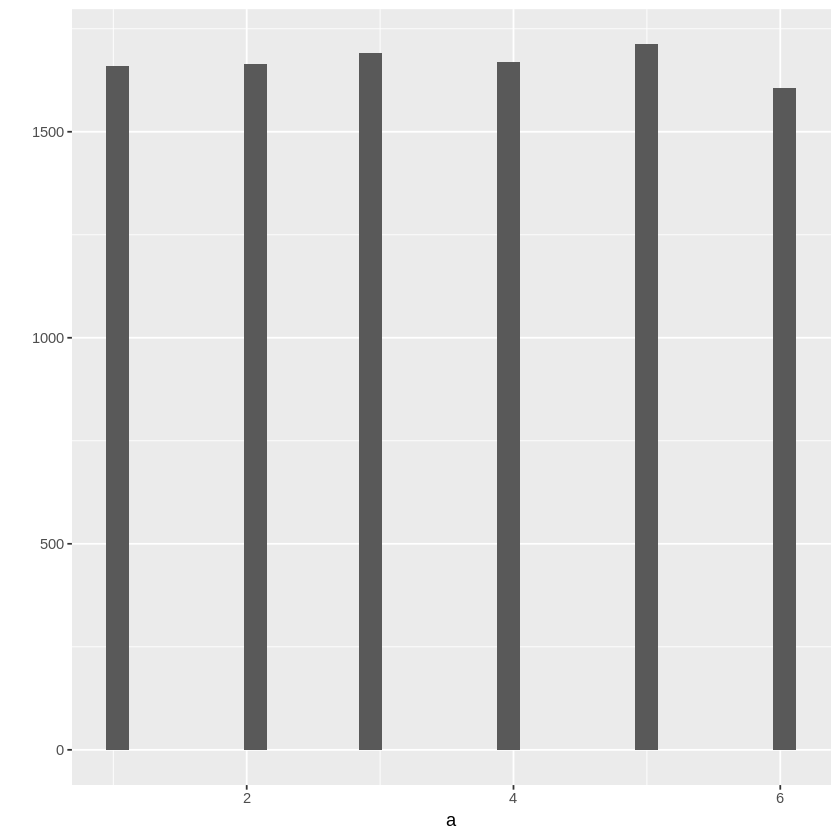

In [132]:
a <- sample(1:6 ,size = 10000 ,replace = TRUE)
qplot(a)

ここでイカサマTime。<br>`
weight`をいじって大きい目が出やすいように書き換えます。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


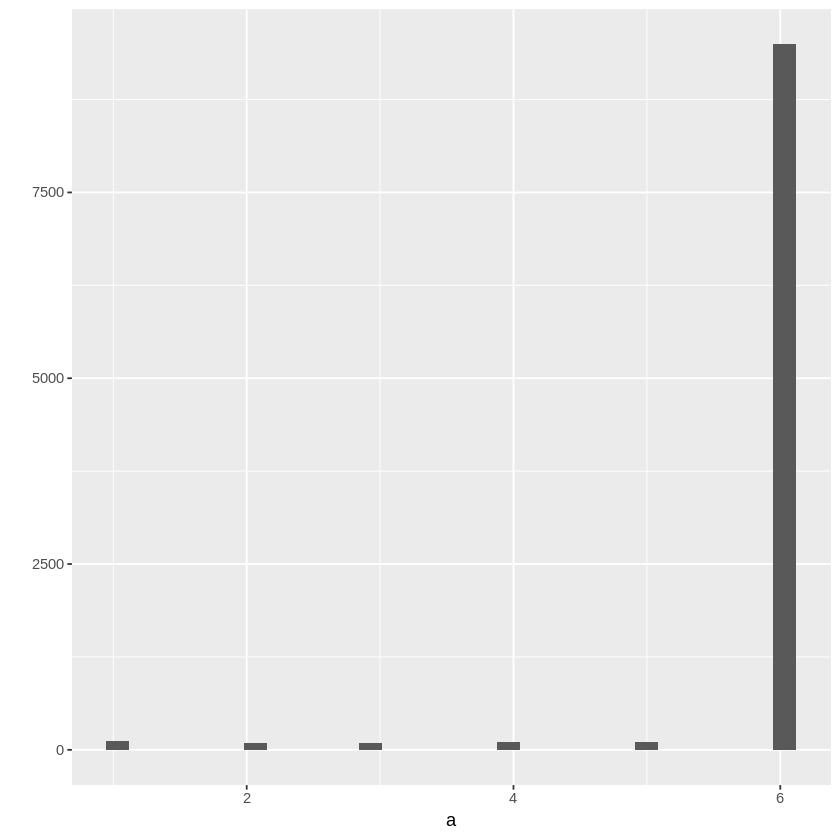

In [143]:
w <- c(1/100,1/100,1/100,1/100,1/100,95/100)
a <- sample(1:6 , size = 10000 , replace = TRUE, prob =w)
qplot(a)